# Composition, Platform and Genre

In [190]:
import os

import matplotlib.pyplot as plt
import pandas as pd

anno_file = '../data/review_sentence_classification-majority_vote.tsv'
anno_review_file = '../data/predictions/sentences-robbert-2025-07-18/prediction-robbert-counts-reviews.tsv.gz'

print(os.path.exists(anno_file))
meta_file = '../data/review-stats.tsv.gz'
genre_file = '../data/work_isbn_title_genre.tsv.gz'

annos = pd.read_csv(anno_file, sep='\t')
anno_reviews = pd.read_csv(anno_review_file, sep='\t')
annos.head(2)

True


review_id  sent_num  sent_offset  sent_end  \
0  impfic-review-10274         1            0        78   
1  impfic-review-10274         2           79       218   

                                           sent_text  Author  Classification  \
0  Jan van Mersbergen (1971) publiceerde sinds 20...       1               0   
1  op 11 november 2011 verscheen 'Naar de overkan...       0               0   

   Content  Content--Narrative  Content--Other  ...  \
0        0                   0               0  ...   
1        1                   1               0  ...   

   Reader_response--Feelings  Reader_response--Identification_and_immersion  \
0                          0                                              0   
1                          0                                              0   

   Reader_response--Reading_Context  Reader_response--Reception  \
0                                 0                           0   
1                                 0                           0   

   Reader_response--Reflection  Recommendations  Style  Style--Context  \
0                            0                0      0               0   
1                            0                0      0               0   

   Style--Structure  Style--Stylistic_features  
0                 0                          0  
1                 0                          0  

[2 rows x 26 columns]

In [61]:
anno_reviews.head(2)

review_id  num_sentences  aut  cla  con  oth  rea  rec  sty  \
0   impfic-review-1             13    0    1   11    0    4    1    0   
1  impfic-review-10             14    0    0    9    1    4    1    1   

   con_nar  ...  con_the  rea_eva  rea_fee  rea_ide  rea_rea  rea_rec  \
0       11  ...        0        3        0        0        0        0   
1        7  ...        1        4        0        0        0        1   

   rea_ref  sty_con  sty_str  sty_sty  
0        0        0        0        0  
1        1        0        1        0  

[2 rows x 22 columns]

In [2]:
from impfic_core.map.map_genre import read_genre_file

genre_df = read_genre_file(genre_file)

genre_df.head(2)

work_id  record_id record_id_type  work_year        work_author  \
0  impfic-work-1      97779           odbr     2010.0  ['Ingalill Roos']   
1  impfic-work-1  326085068            ppn     2010.0  ['Ingalill Roos']   

                                          work_title  work_length    nur  \
0  ['Energievreters -- omgaan met mensen waar je ...          NaN  [770]   
1  ['Energievreters -- omgaan met mensen waar je ...          NaN  [770]   

  thema bisac            brinkman                    unesco    nur_genre  
0   NaN   NaN  [sociale relaties]  [Sociologie, statistiek]  Non-fiction  
1   NaN   NaN  [sociale relaties]  [Sociologie, statistiek]  Non-fiction

In [3]:
print(genre_df.shape)
print(genre_df[['work_id', 'nur_genre']].drop_duplicates().shape)
genre_df = genre_df[['work_id', 'nur_genre']].drop_duplicates()

(454592, 13)
(125542, 2)


In [188]:
#meta_df = pd.read_csv(meta_file, sep='\t', compression='gzip')
meta_df = meta_df.drop('review_text', axis=1)
meta_df.head(2)

source             user_id        review_id  review_num_terms  \
0  NBD_Biblion  impfic-user-210320  impfic-review-1               206   
1  NBD_Biblion  impfic-user-210320  impfic-review-2               212   

   review_num_words  num_sentences review_date  rating            work_id  
0               185             13         NaN     NaN   impfic-work-3723  
1               185              7         NaN     NaN  impfic-work-36913

In [189]:
meta_df.to_csv('../data/review-stats.tsv.gz', index=False, sep='\t', compression='gzip')

In [6]:
genre_df.shape, meta_df.shape

((125542, 2), (670924, 10))

In [7]:
meta_df.shape

(670924, 10)

In [8]:
meta_df.source.value_counts()

source
Bol            254081
Hebban         210588
Goodreads       90601
WLJN            38210
NBD_Biblion     36310
Dizzie          26880
Boekmeter        7250
LTL              7004
Name: count, dtype: int64

In [9]:
import numpy as np

meta_df['length_log'] = meta_df.review_num_words.apply(lambda x: np.log(x+1))
meta_df['length_log_bin'] = meta_df.review_num_words.apply(lambda x: int(np.log(x+1) * 2)/2)

In [10]:
meta_df.head(2)
genre_df.head(2)
meta_genre = pd.merge(meta_df, genre_df, on='work_id')
meta_genre_all = meta_genre.groupby('nur_genre').source.value_counts().unstack().fillna(0.0)
meta_genre_all

source              Boekmeter      Bol   Dizzie  Goodreads   Hebban     LTL  \
nur_genre                                                                     
Children_fiction         76.0  13333.0    459.0     1288.0   8932.0    75.0   
Fantasy_fiction          88.0   6191.0    310.0      452.0   4746.0    39.0   
Historical_fiction       10.0   1027.0     92.0      372.0   1599.0    13.0   
Literary_fiction       1686.0  63011.0  11552.0    33299.0  65597.0  1938.0   
Literary_thriller       168.0  22874.0   5533.0     5894.0  33019.0   431.0   
Non-fiction             101.0  74815.0    975.0     1505.0  15160.0    85.0   
Other fiction           144.0  15293.0   1330.0     2749.0  13139.0   174.0   
Regional_fiction          0.0    525.0    149.0       47.0    585.0     0.0   
Romance                   0.0   1871.0    257.0      629.0   3186.0    10.0   
Suspense                275.0  18903.0   3469.0     4473.0  33454.0   509.0   
Young_adult              75.0   9864.0    873.0     2803.0  14222.0   123.0   

source              NBD_Biblion     WLJN  
nur_genre                                 
Children_fiction         2387.0    911.0  
Fantasy_fiction           661.0   1275.0  
Historical_fiction        178.0    177.0  
Literary_fiction         7166.0  16845.0  
Literary_thriller        1330.0   7812.0  
Non-fiction             13809.0   2442.0  
Other fiction            2674.0   1913.0  
Regional_fiction          154.0     68.0  
Romance                   179.0    296.0  
Suspense                 2206.0   5276.0  
Young_adult              1188.0   1115.0

In [11]:
meta_genre[meta_genre.nur_genre.isna()]
meta_genre['nur_genre'] = meta_genre.nur_genre.apply(lambda x: 'unknown' if pd.isna(x) else x)

In [12]:
selected_genres = [
    'Children_fiction', 'Fantasy_fiction', 'Historical_fiction',
    'Literary_fiction', 'Literary_thriller', 
    #'Non-fiction', 
    'Other fiction',
    'Regional_fiction', 'Romance', 'Suspense', 'Young_adult'
]

In [13]:
meta_genre_selected = meta_genre_all.loc[selected_genres][['Bol', 'Goodreads', 'Hebban', 'NBD_Biblion']]

In [14]:
meta_genre_all_frac = meta_genre_selected.div(meta_genre_selected.sum().T)

meta_genre_all_frac.style.background_gradient(axis=None)

In [15]:
meta_genre.columns

Index(['source', 'user_id', 'review_id', 'review_num_terms',
       'review_num_words', 'num_sentences', 'review_date', 'review_text',
       'rating', 'work_id', 'length_log', 'length_log_bin', 'nur_genre'],
      dtype='object')

In [16]:
meta_df[meta_df.review_id == 'impfic-review-10274']

source             user_id            review_id  review_num_terms  \
10237  NBD_Biblion  impfic-user-210320  impfic-review-10274               195   

       review_num_words  num_sentences review_date  \
10237               169             10         NaN   

                                             review_text  rating  \
10237  Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   

                work_id  length_log  length_log_bin  
10237  impfic-work-3797    5.135798             5.0

In [17]:
meta_df.length_log_bin.value_counts()

length_log_bin
4.0    99859
5.0    96570
3.5    96297
4.5    92320
3.0    73940
5.5    64861
6.0    50346
2.5    44432
2.0    17782
6.5    10288
1.0     9593
1.5     9128
0.5     3410
7.0     1696
7.5      340
8.0       44
0.0       11
8.5        6
9.0        1
Name: count, dtype: int64

In [18]:
anno_meta = pd.merge(meta_genre, annos, on='review_id', how='right')

anno_meta['sent_chars'] = anno_meta.apply(lambda row: row['sent_end'] - row['sent_offset'], axis=1)

print(anno_meta.shape)
anno_meta.head(2)

(11634, 39)


source             user_id            review_id  review_num_terms  \
0  NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
1  NBD_Biblion  impfic-user-210320  impfic-review-10274               195   

   review_num_words  num_sentences review_date  \
0               169             10         NaN   
1               169             10         NaN   

                                         review_text  rating  \
0  Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
1  Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   

            work_id  ...  Reader_response--Identification_and_immersion  \
0  impfic-work-3797  ...                                              0   
1  impfic-work-3797  ...                                              0   

   Reader_response--Reading_Context Reader_response--Reception  \
0                                 0                          0   
1                                 0                          0   

   Reader_response--Reflection  Recommendations  Style Style--Context  \
0                            0                0      0              0   
1                            0                0      0              0   

   Style--Structure  Style--Stylistic_features  sent_chars  
0                 0                          0          78  
1                 0                          0         139  

[2 rows x 39 columns]

In [77]:
anno_review_freq = pd.merge(meta_genre, anno_reviews, on=['review_id', 'num_sentences'], how='right')
anno_review_freq

source             user_id            review_id  \
0       NBD_Biblion  impfic-user-210320      impfic-review-1   
1       NBD_Biblion  impfic-user-210320     impfic-review-10   
2       NBD_Biblion  impfic-user-210320    impfic-review-100   
3       NBD_Biblion  impfic-user-210320   impfic-review-1000   
4       NBD_Biblion  impfic-user-210320  impfic-review-10000   
...             ...                 ...                  ...   
670745       Hebban  impfic-user-214500  impfic-review-99995   
670746       Hebban  impfic-user-220785  impfic-review-99996   
670747       Hebban  impfic-user-220786  impfic-review-99997   
670748          NaN                 NaN  impfic-review-99998   
670749       Hebban  impfic-user-210792  impfic-review-99999   

        review_num_terms  review_num_words  num_sentences  \
0                  206.0             185.0             13   
1                  228.0             202.0             14   
2                  157.0             137.0              7   
3                  190.0             168.0             13   
4                  191.0             175.0             11   
...                  ...               ...            ...   
670745             265.0             239.0             15   
670746             126.0             110.0             10   
670747             162.0             147.0             11   
670748               NaN               NaN             34   
670749             241.0             220.0             15   

                review_date  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
...                     ...   
670745  2021-05-26 00:09:20   
670746  2021-04-20 22:52:36   
670747  2021-04-17 14:19:30   
670748                  NaN   
670749  2021-04-15 09:48:38   

                                              review_text  rating  \
0       Als Tom 15 jaar geworden is, verandert zijn le...     NaN   
1       Je zult maar gek van mode zijn, in de brugklas...     NaN   
2       Gebaseerd op een eenvoudig model, een klein ro...     NaN   
3       De 16-jarige Reza komt samen met zijn zus en m...     NaN   
4       Carrie is een timide en introvert 8-jarig meis...     NaN   
...                                                   ...     ...   
670745  De Tweede Stem is een goed geschreven boek waa...     3.0   
670746  Dit boek gaat over Mette. Ze heeft een vervele...     5.0   
670747  De tweede stem is een origineel en spannend bo...     5.0   
670748                                                NaN     NaN   
670749  De sobere maar zeer mooie cover en titel staan...     3.0   

                  work_id  ...  con_the  rea_eva rea_fee  rea_ide  rea_rea  \
0        impfic-work-3723  ...        0        3       0        0        0   
1       impfic-work-19719  ...        1        4       0        0        0   
2       impfic-work-13292  ...        0        1       0        0        0   
3       impfic-work-13721  ...        0        2       0        0        0   
4       impfic-work-17475  ...        0        2       0        1        0   
...                   ...  ...      ...      ...     ...      ...      ...   
670745  impfic-work-18247  ...        1        6       0        2        3   
670746  impfic-work-18247  ...        1        5       0        0        1   
670747  impfic-work-18247  ...        1        6       1        0        1   
670748                NaN  ...        1       10       1        0        0   
670749  impfic-work-18247  ...        3        4       0        0        0   

        rea_rec  rea_ref  sty_con  sty_str  sty_sty  
0             0        0        0        0        0  
1             1        1        0        1        0  
2             0        1        0        0        0  
3             0        0        0        0        1  
4             0        0        0        0        2  
...         ...      ...      ...      ...      

In [19]:
anno_meta.columns

Index(['source', 'user_id', 'review_id', 'review_num_terms',
       'review_num_words', 'num_sentences', 'review_date', 'review_text',
       'rating', 'work_id', 'length_log', 'length_log_bin', 'nur_genre',
       'sent_num', 'sent_offset', 'sent_end', 'sent_text', 'Author',
       'Classification', 'Content', 'Content--Narrative', 'Content--Other',
       'Content--Quote', 'Content--Theme', 'None', 'Other_works',
       'Reader_response', 'Reader_response--Evaluation_of_quality',
       'Reader_response--Feelings',
       'Reader_response--Identification_and_immersion',
       'Reader_response--Reading_Context', 'Reader_response--Reception',
       'Reader_response--Reflection', 'Recommendations', 'Style',
       'Style--Context', 'Style--Structure', 'Style--Stylistic_features',
       'sent_chars'],
      dtype='object')

In [20]:
anno_meta.columns

Index(['source', 'user_id', 'review_id', 'review_num_terms',
       'review_num_words', 'num_sentences', 'review_date', 'review_text',
       'rating', 'work_id', 'length_log', 'length_log_bin', 'nur_genre',
       'sent_num', 'sent_offset', 'sent_end', 'sent_text', 'Author',
       'Classification', 'Content', 'Content--Narrative', 'Content--Other',
       'Content--Quote', 'Content--Theme', 'None', 'Other_works',
       'Reader_response', 'Reader_response--Evaluation_of_quality',
       'Reader_response--Feelings',
       'Reader_response--Identification_and_immersion',
       'Reader_response--Reading_Context', 'Reader_response--Reception',
       'Reader_response--Reflection', 'Recommendations', 'Style',
       'Style--Context', 'Style--Structure', 'Style--Stylistic_features',
       'sent_chars'],
      dtype='object')

In [21]:
#anno_meta = pd.merge(meta_genre, anno_meta, on='review_id', how='right')
anno_meta

source             user_id            review_id  review_num_terms  \
0      NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
1      NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
2      NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
3      NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
4      NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
...            ...                 ...                  ...               ...   
11629       Hebban  impfic-user-212034  impfic-review-84086               121   
11630       Hebban  impfic-user-212034  impfic-review-84086               121   
11631       Hebban  impfic-user-212034  impfic-review-84086               121   
11632       Hebban  impfic-user-212034  impfic-review-84086               121   
11633       Hebban  impfic-user-212034  impfic-review-84086               121   

       review_num_words  num_sentences          review_date  \
0                   169             10                  NaN   
1                   169             10                  NaN   
2                   169             10                  NaN   
3                   169             10                  NaN   
4                   169             10                  NaN   
...                 ...            ...                  ...   
11629               112              8  2018-06-21 09:57:15   
11630               112              8  2018-06-21 09:57:15   
11631               112              8  2018-06-21 09:57:15   
11632               112              8  2018-06-21 09:57:15   
11633               112              8  2018-06-21 09:57:15   

                                             review_text  rating  \
0      Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
1      Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
2      Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
3      Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
4      Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
...                                                  ...     ...   
11629  Het andere boek wat ik gelezen heb van deze sc...     4.0   
11630  Het andere boek wat ik gelezen heb van deze sc...     4.0   
11631  Het andere boek wat ik gelezen heb van deze sc...     4.0   
11632  Het andere boek wat ik gelezen heb van deze sc...     4.0   
11633  Het andere boek wat ik gelezen heb van deze sc...     4.0   

                 work_id  ...  Reader_response--Identification_and_immersion  \
0       impfic-work-3797  ...                                              0   
1       impfic-work-3797  ...                                              0   
2       impfic-work-3797  ...                                              0   
3       impfic-work-3797  ...                                              0   
4       impfic-work-3797  ...                                              0   
...                  ...  ...                                            ...   
11629  impfic-work-22169  ...                                              0   
11630  impfic-work-22169  ...                                              0   
11631  impfic-work-22169  ...                                              1   
11632  impfic-work-22169  ...                                              0   
11633  impfic-work-22169  ...                                              0   

       Reader_response--Reading_Context Reader_response--Reception  \
0                                     0                          0   
1                                     0                          0   
2                                     0                          0   
3                                     0                          0   
4                                     0                          0   
...                                 ...                        ...   
11629         

## Per platform

### Number of review sentences per platform

In [22]:
source_sents = anno_meta.source.value_counts()
source_sents

source
Hebban         6755
Bol            2863
Goodreads      1048
NBD_Biblion     968
Name: count, dtype: int64

### Number of reviews per platform

In [23]:
source_reviews = anno_meta[['source', 'review_id']].drop_duplicates().source.value_counts()
source_reviews

source
Bol            482
Hebban         419
Goodreads      162
NBD_Biblion     89
Name: count, dtype: int64

### Review lengths per platform

In [24]:
anno_meta[['source', 'review_id', 'review_num_words']].drop_duplicates().review_num_words.describe()

count    1152.000000
mean      147.204861
std       155.393633
min        10.000000
25%        38.000000
50%        88.000000
75%       192.250000
max      1205.000000
Name: review_num_words, dtype: float64

In [25]:
anno_meta[['source', 'review_id', 'review_num_words']].drop_duplicates().groupby('source').review_num_words.describe()

count        mean         std   min    25%    50%     75%     max
source                                                                        
Bol          482.0   80.452282   92.543448  10.0   27.0   48.0   92.25   673.0
Goodreads    162.0   89.308642  101.671697  10.0   25.0   49.0  104.75   650.0
Hebban       419.0  243.389021  191.576547  11.0   85.5  199.0  358.50  1205.0
NBD_Biblion   89.0  161.280899   30.842705  81.0  150.0  167.0  179.00   277.0

The annotated reviews from Bol and Goodreads are relatively short compared to those from NBD Biblion and especially Hebban.

<Axes: xlabel='sent_chars', ylabel='Density'>

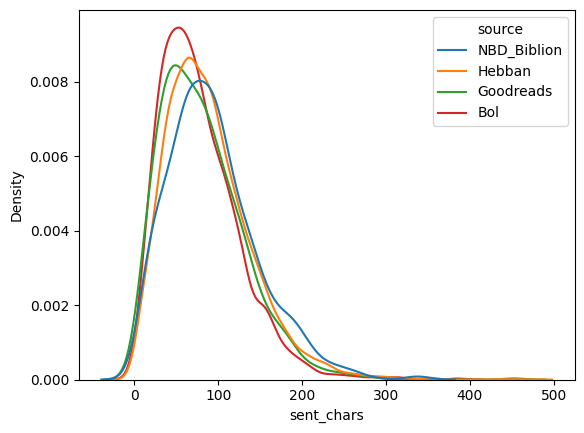

In [26]:
import seaborn as sns

sns.kdeplot(anno_meta, x='sent_chars', hue='source', common_norm=False)

In [27]:
anno_meta.groupby('source').sent_chars.describe()

count       mean        std  min   25%   50%     75%    max
source                                                                   
Bol          2863.0  77.124694  47.041028  1.0  42.0  69.0  103.00  388.0
Goodreads    1048.0  80.571565  49.739058  1.0  43.0  73.5  109.00  453.0
Hebban       6755.0  87.953220  51.083271  1.0  51.0  80.0  116.00  472.0
NBD_Biblion   968.0  93.211777  53.456509  1.0  56.0  86.5  122.25  342.0

Sentences are also slightly shorter in Bol and Goodreads reviews than in Hebban and NBD Biblion reviews, but the differences are much smaller.

<Axes: xlabel='sent_chars'>

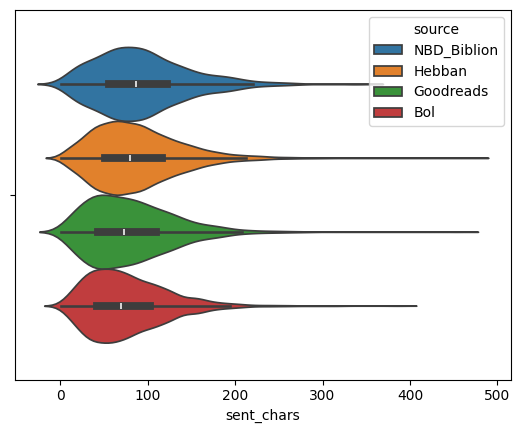

In [28]:
#sns.barplot(anno_meta, x='sent_chars', hue='source', errorbar='pi')
sns.violinplot(anno_meta, x='sent_chars', hue='source')

In [29]:
anno_meta.columns

Index(['source', 'user_id', 'review_id', 'review_num_terms',
       'review_num_words', 'num_sentences', 'review_date', 'review_text',
       'rating', 'work_id', 'length_log', 'length_log_bin', 'nur_genre',
       'sent_num', 'sent_offset', 'sent_end', 'sent_text', 'Author',
       'Classification', 'Content', 'Content--Narrative', 'Content--Other',
       'Content--Quote', 'Content--Theme', 'None', 'Other_works',
       'Reader_response', 'Reader_response--Evaluation_of_quality',
       'Reader_response--Feelings',
       'Reader_response--Identification_and_immersion',
       'Reader_response--Reading_Context', 'Reader_response--Reception',
       'Reader_response--Reflection', 'Recommendations', 'Style',
       'Style--Context', 'Style--Structure', 'Style--Stylistic_features',
       'sent_chars'],
      dtype='object')

In [30]:
anno_meta.head(2)

source             user_id            review_id  review_num_terms  \
0  NBD_Biblion  impfic-user-210320  impfic-review-10274               195   
1  NBD_Biblion  impfic-user-210320  impfic-review-10274               195   

   review_num_words  num_sentences review_date  \
0               169             10         NaN   
1               169             10         NaN   

                                         review_text  rating  \
0  Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   
1  Jan van Mersbergen (1971) publiceerde sinds 20...     NaN   

            work_id  ...  Reader_response--Identification_and_immersion  \
0  impfic-work-3797  ...                                              0   
1  impfic-work-3797  ...                                              0   

   Reader_response--Reading_Context Reader_response--Reception  \
0                                 0                          0   
1                                 0                          0   

   Reader_response--Reflection  Recommendations  Style Style--Context  \
0                            0                0      0              0   
1                            0                0      0              0   

   Style--Structure  Style--Stylistic_features  sent_chars  
0                 0                          0          78  
1                 0                          0         139  

[2 rows x 39 columns]

### Category frequencies per platform

In [31]:
cat_cols = [
    'Author', 'Classification', 'Content', 'Content--Narrative',
    'Content--Other', 'Content--Quote', 'Content--Theme', 'None',
    'Other_works', 'Reader_response',
    'Reader_response--Evaluation_of_quality', 'Reader_response--Feelings',
    'Reader_response--Identification_and_immersion',
    'Reader_response--Reading_Context', 'Reader_response--Reception',
    'Reader_response--Reflection', 'Recommendations', 'Style',
    'Style--Context', 'Style--Structure', 'Style--Stylistic_features'
]

main_cols = [col for col in cat_cols if '--' not in col]
sub_cols = [col for col in cat_cols if '--' in col]

anno_meta[main_cols].head(2)

Author  Classification  Content  None  Other_works  Reader_response  \
0       1               0        0     0            0                0   
1       0               0        1     0            0                0   

   Recommendations  Style  
0                0      0  
1                0      0

The number of sentences per category per platform:

In [33]:
source_main_cat = anno_meta.groupby(['source'])[main_cols].sum()
source_main_cat

Author  Classification  Content  None  Other_works  \
source                                                            
Bol             294              61     1142     0          202   
Goodreads       134              37      502     0           40   
Hebban          779             194     3914     0          305   
NBD_Biblion     121              51      639     0           65   

             Reader_response  Recommendations  Style  
source                                                
Bol                     1835              116    290  
Goodreads                654               17    119  
Hebban                  3083               96    601  
NBD_Biblion              226               14    100

The fraction of sentences with a category per platforms:

In [34]:
source_main_cat.T.div(source_sents).style.format(precision=2).background_gradient(axis=0)

Bol and Goodreads have a relatively large fraction of reader response sentences, especially compared to NBD Biblion (where reviews are written with the intention of being impersonal). In contrast, a relatively high fraction of sentences in NBD Biblion and Hebban reviews mention the content of the book. 

In [48]:
length_sents = anno_meta.length_log_bin.value_counts()
length_main_cat = anno_meta.groupby(['length_log_bin'])[main_cols].sum()
length_main_cat.T.div(length_sents).style.format(precision=2).background_gradient(axis=0)

There is a relatively clear relationship between length and categories.

In [99]:
genre_sents = anno_meta.nur_genre.value_counts()
genre_main_cat = anno_meta.groupby(['nur_genre'])[main_cols].sum()
genre_main_cat.T.div(genre_sents).style.format(precision=2).background_gradient(axis=0)

## Crosstables of genre and platform per category

In [167]:
anno_meta['num_sentences'] = anno_meta.groupby('review_id').sent_num.transform('max')

anno_freq = (anno_meta
             .groupby(['nur_genre', 'source', 'review_id', 'num_sentences', 'length_log_bin'])[main_cols]
             .sum()
             .reset_index())
anno_frac = anno_freq[main_cols].T.div(anno_freq.num_sentences).T

anno_frac = pd.concat([anno_freq[['nur_genre', 'source', 'review_id', 'num_sentences', 'length_log_bin']], anno_frac], axis=1)

anno_freq.shape, anno_frac.shape

((1152, 13), (1152, 13))

In [184]:
cat = 'Content'
anno_frac.groupby(['source', 'nur_genre'])[cat].mean().unstack().fillna(0.0).T.style.format(precision=2).background_gradient(axis=None)

In [185]:
cat = 'Reader_response'
anno_frac.groupby(['source', 'nur_genre'])[cat].mean().unstack().fillna(0.0).T.style.format(precision=2).background_gradient(axis=None)

In [186]:
cat = 'Style'
anno_frac.groupby(['source', 'nur_genre'])[cat].mean().unstack().fillna(0.0).T.style.format(precision=2).background_gradient(axis=None)

## Ground Truth Annotations - Relation between source, length and category count

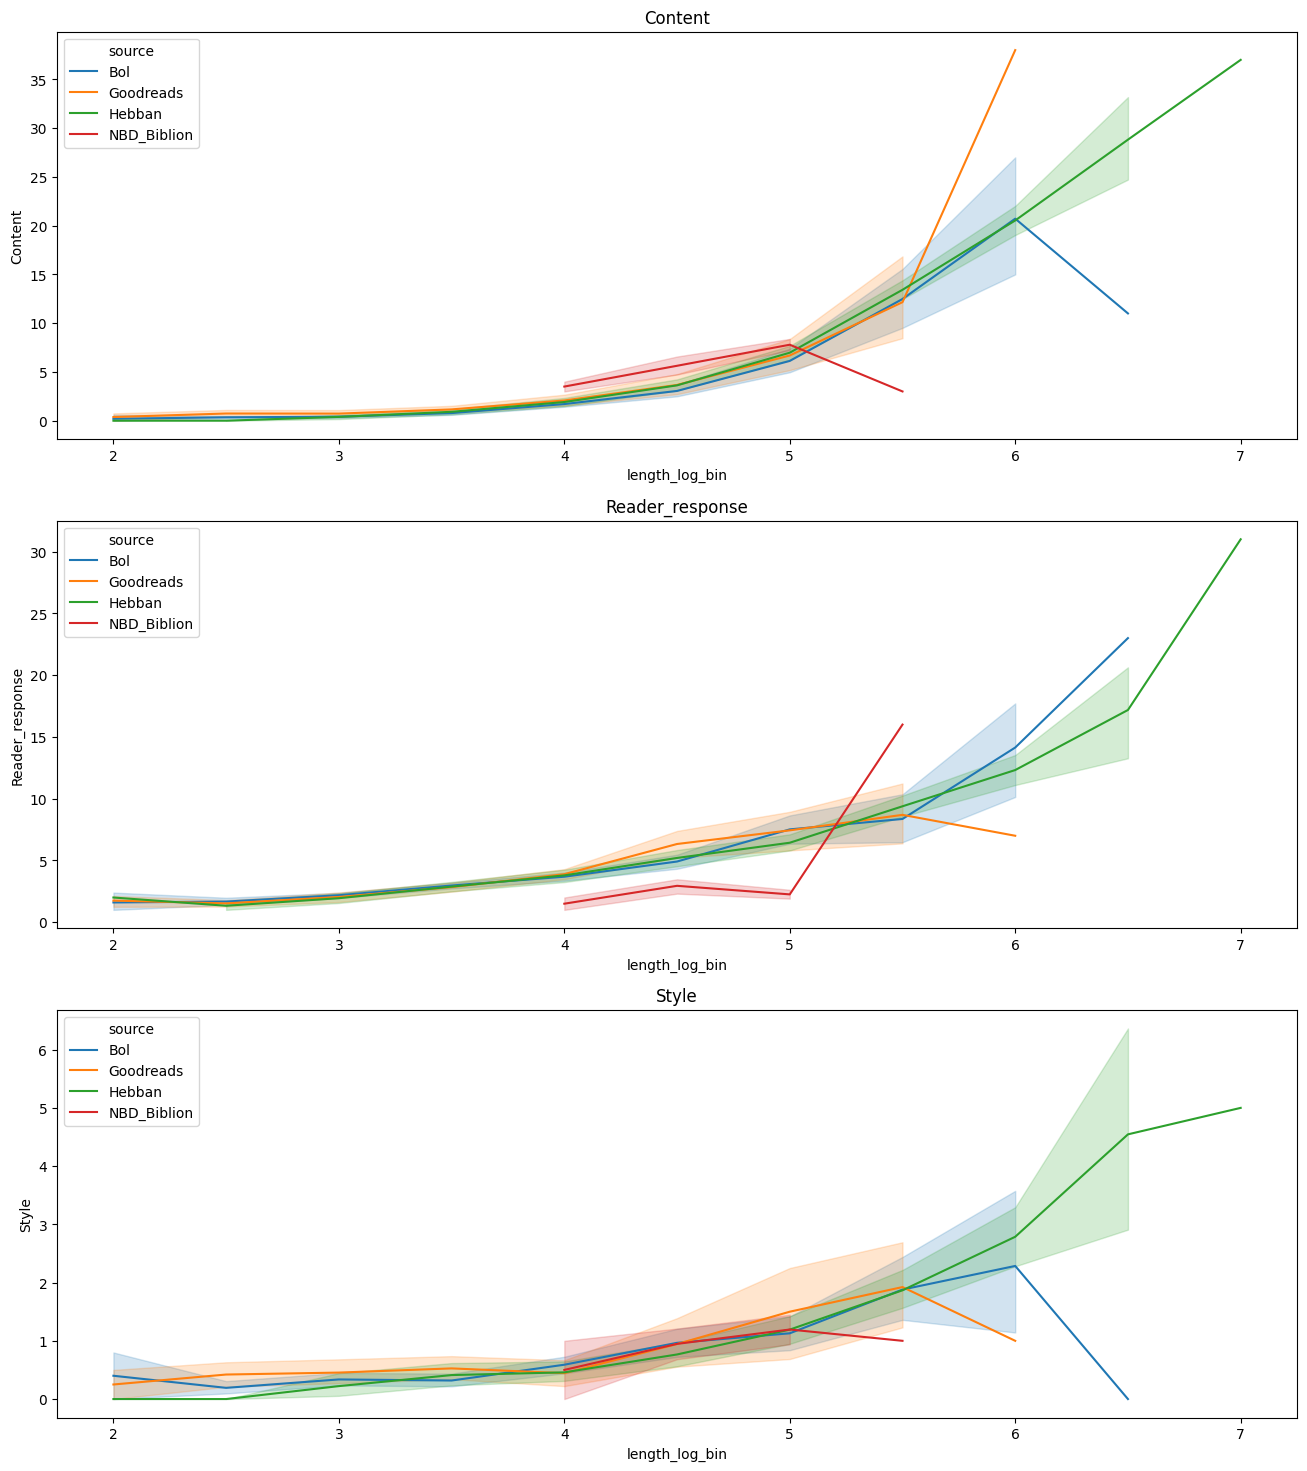

In [165]:
fig, ax = plt.subplots(3, 1)
anno_meta.columns
cats = ['Content', 'Reader_response', 'Style']
for ci, cat in enumerate(cats):
    sns.lineplot(anno_freq, x='length_log_bin', y=cat, hue='source', ax=ax[ci])
    ax[ci].title.set_text(cat)
    
fig.set_size_inches(16, 18)

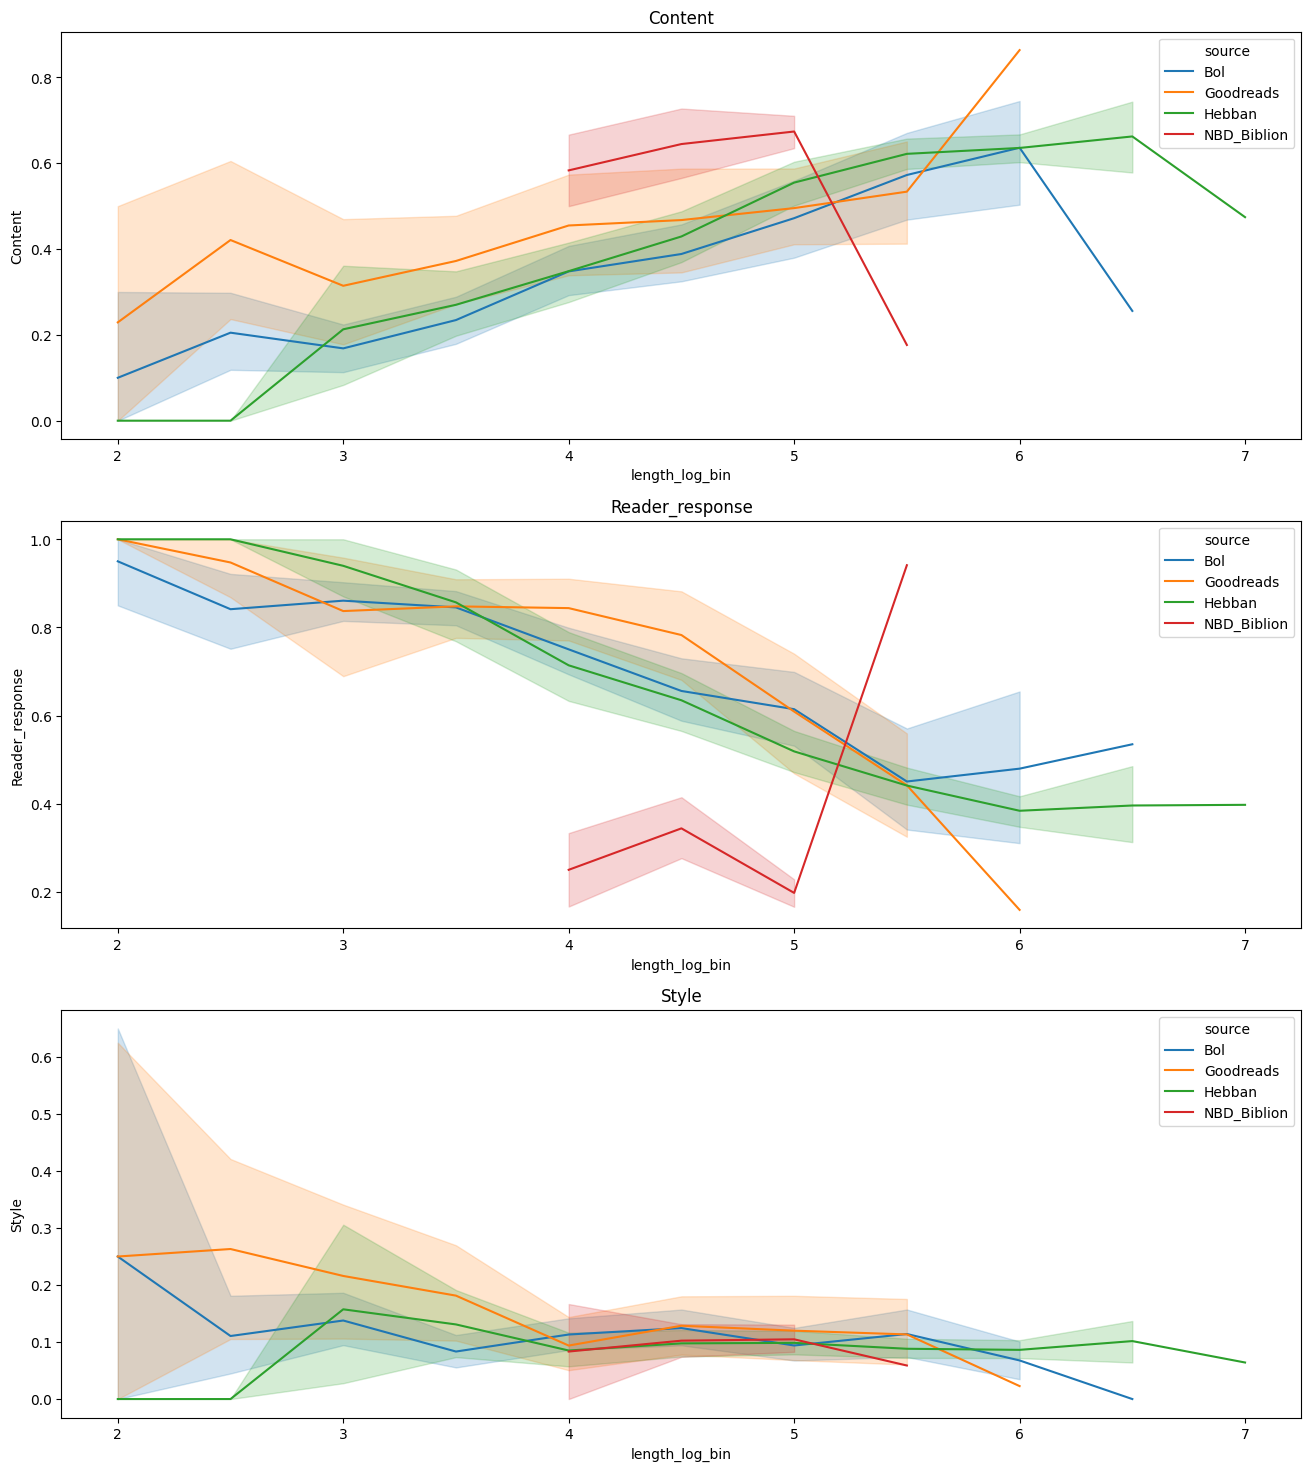

In [168]:
fig, ax = plt.subplots(3, 1)
anno_meta.columns
cats = ['Content', 'Reader_response', 'Style']
for ci, cat in enumerate(cats):
    sns.lineplot(anno_frac, x='length_log_bin', y=cat, hue='source', ax=ax[ci])
    ax[ci].title.set_text(cat)
    
fig.set_size_inches(16, 18)

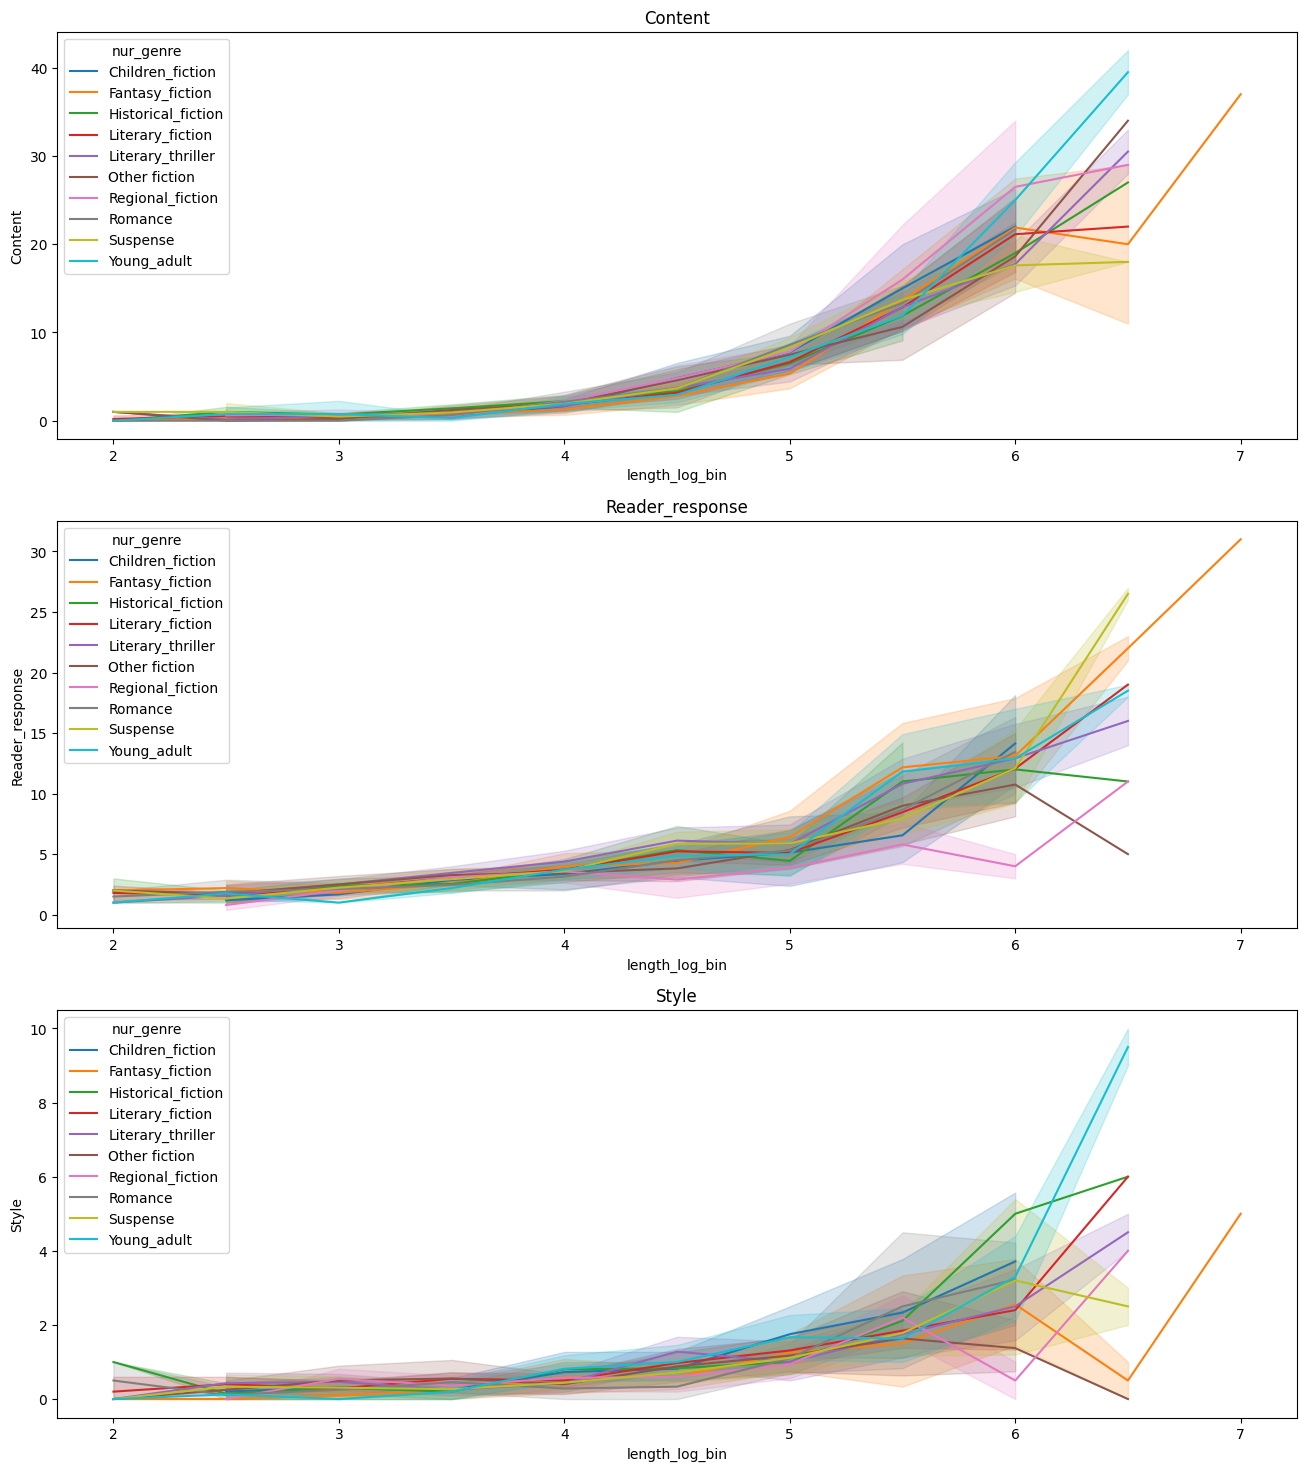

In [166]:
fig, ax = plt.subplots(3, 1)

cats = ['Content', 'Reader_response', 'Style']
for ci, cat in enumerate(cats):
    sns.lineplot(anno_freq, x='length_log_bin', y=cat, hue='nur_genre', ax=ax[ci])
    ax[ci].title.set_text(cat)
    
fig.set_size_inches(16, 18)

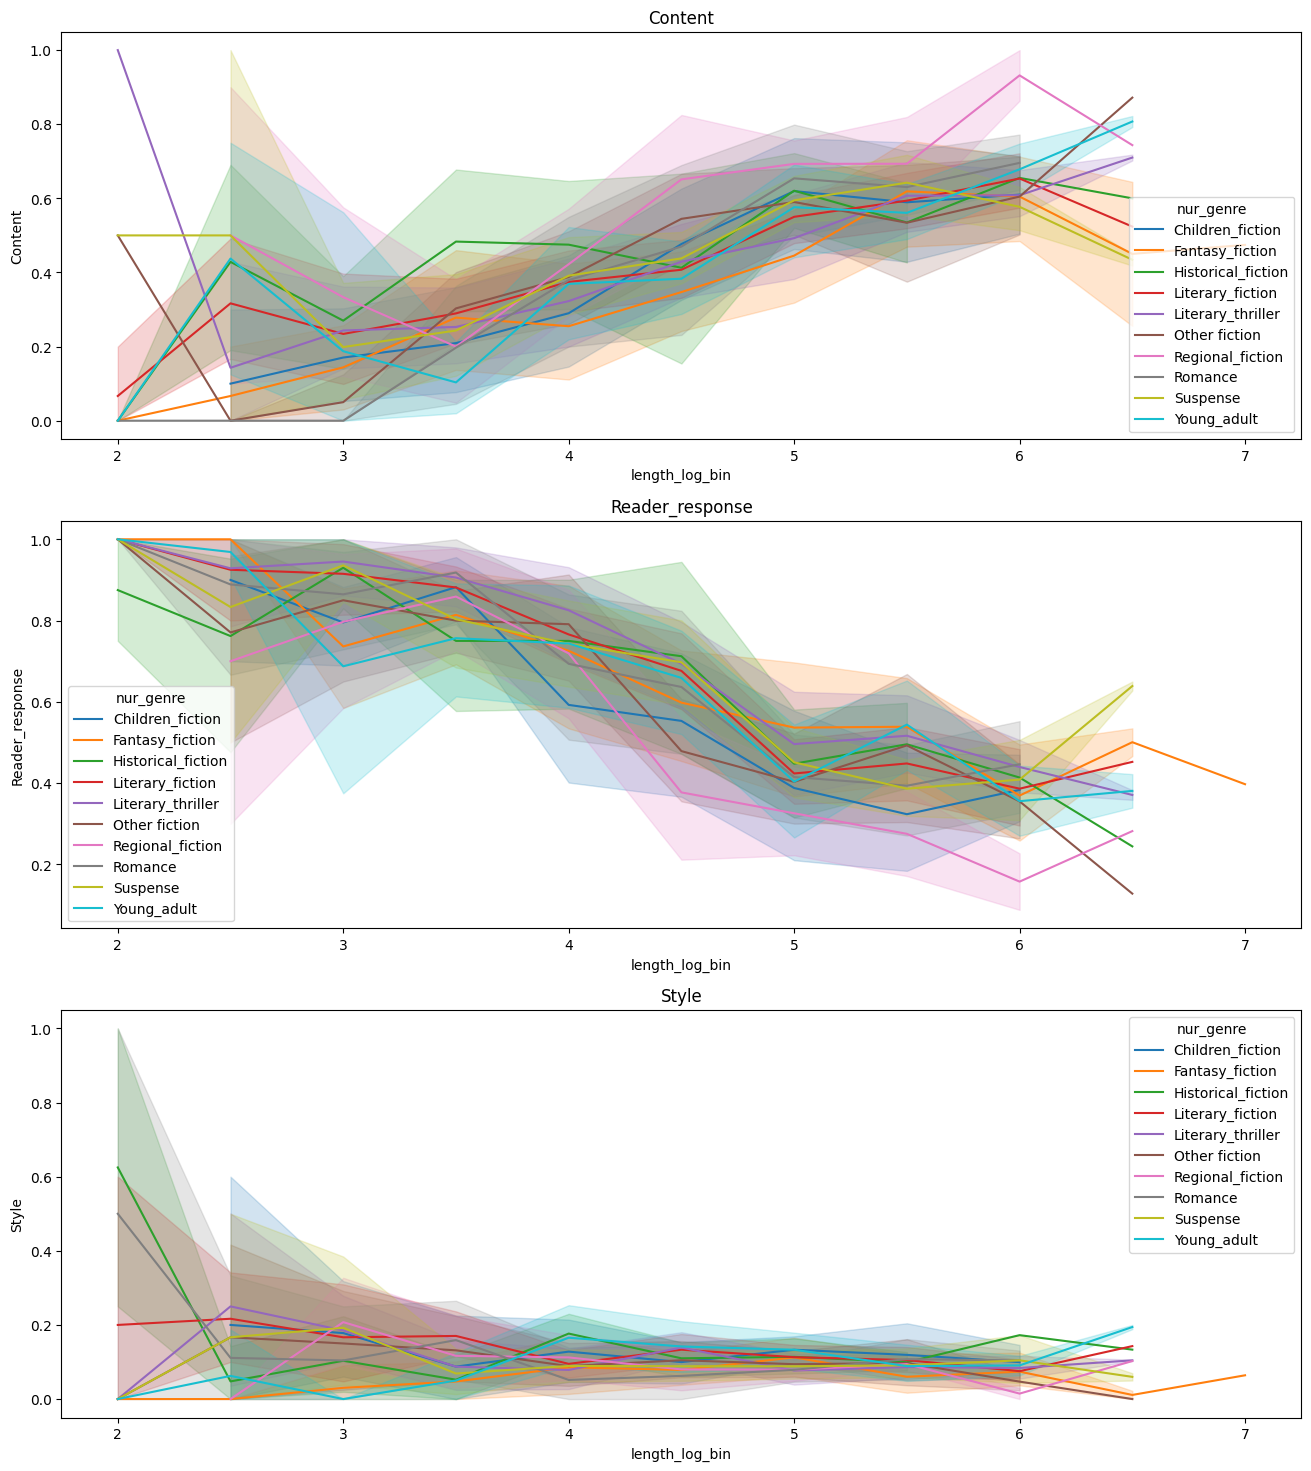

In [169]:
fig, ax = plt.subplots(3, 1)

cats = ['Content', 'Reader_response', 'Style']
for ci, cat in enumerate(cats):
    sns.lineplot(anno_frac, x='length_log_bin', y=cat, hue='nur_genre', ax=ax[ci])
    ax[ci].title.set_text(cat)
    
fig.set_size_inches(16, 18)

## All review annotations - Relation between source, length and category fraction

### Filtering Platforms and Genres

Focus only on platforms and genres for which we have plenty of data, and reduce the number of values to show in the visualisations.

In [83]:
s = anno_review_freq.source.value_counts()
s[s > 30000]
big_sources = s[s > 30000].index
big_sources_freq = anno_review_freq[anno_review_freq.source.isin(big_sources)]


In [172]:
s = anno_review_freq[(anno_review_freq.source != 'NBD_Biblion') & (anno_review_freq.nur_genre != 'unknown')].nur_genre.value_counts()
s[s > 25000]
big_genres = s[s > 20000].index
big_genres_freq = anno_review_freq[anno_review_freq.nur_genre.isin(big_genres)]
s

nur_genre
Literary_fiction      159394
Non-fiction            79074
Literary_thriller      62772
Suspense               54608
Other fiction          28076
Young_adult            21679
Children_fiction       18624
Fantasy_fiction        10414
Romance                 4908
Historical_fiction      2799
Regional_fiction        1122
Name: count, dtype: int64

In [173]:
cat_cols_short = [
    'aut', 'cla', 'con', 'oth', 'rea', 'rec', 'sty', 
    'con_nar', 'con_oth', 'con_quo', 'con_the', 
    'rea_eva', 'rea_fee', 'rea_ide', 'rea_rea', 'rea_rec', 'rea_ref', 
    'sty_con', 'sty_str', 'sty_sty'
]
meta_cols = [col for col in anno_review_freq.columns if col not in cat_cols_short]

temp = anno_review_freq[cat_cols_short].T.div(anno_review_freq.num_sentences).T
anno_review_frac = pd.concat([anno_review_meta[meta_cols], temp], axis=1)
big_sources_frac = anno_review_frac[anno_review_frac.source.isin(big_sources)]
big_genres_frac = anno_review_frac[anno_review_frac.nur_genre.isin(big_genres)]


In [174]:
big_genres_frac.nur_genre.value_counts()

nur_genre
Literary_fiction     166087
Non-fiction           92098
Literary_thriller     64038
Suspense              56714
Other fiction         30556
Young_adult           22829
Name: count, dtype: int64

In [105]:
cat_map = {
    'con': 'Content',
    'aut': 'Author',
    'cla': 'Classification',
    'oth': 'Other works',
    'rea': 'Reader response',
    'rec': 'Recommendation',
    'sty': 'Style'
}

<Axes: xlabel='length_log', ylabel='Density'>

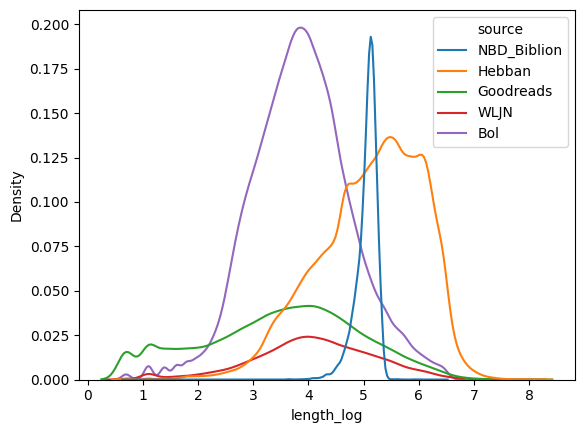

In [115]:
sns.kdeplot(big_sources_freq, x='length_log', hue='source')

<Axes: xlabel='length_log', ylabel='Density'>

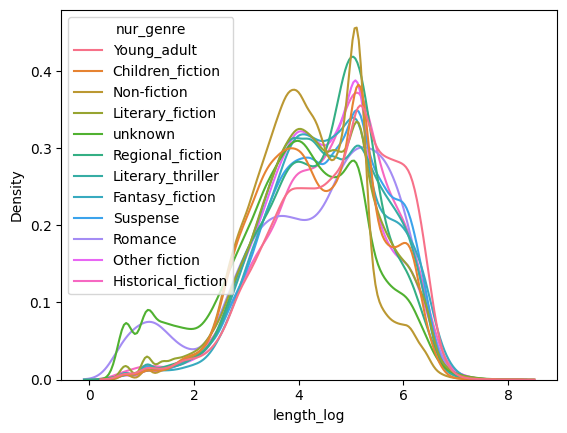

In [119]:
sns.kdeplot(big_sources_freq, x='length_log', hue='nur_genre', common_norm=False)

In [131]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

bs_lm=ols('length_log ~ nur_genre + source', data=big_sources_freq).fit() #Specify C for Categorical
print(sm.stats.anova_lm(bs_lm, typ=2))



                  sum_sq        df             F  PR(>F)
nur_genre    2673.462073      11.0    252.134232     0.0
source     200965.719342       4.0  52120.966629     0.0
Residual   498268.718605  516909.0           NaN     NaN


In [120]:
big_sources_freq.groupby('nur_genre').length_log.describe()

count      mean       std       min       25%  \
nur_genre                                                              
Children_fiction     20411.0  4.340996  1.135971  0.693147  3.496508   
Fantasy_fiction      10674.0  4.542407  1.112112  0.693147  3.784190   
Historical_fiction    2865.0  4.555581  1.154987  0.693147  3.828641   
Literary_fiction    153358.0  4.350008  1.171838  0.693147  3.583519   
Literary_thriller    58790.0  4.446350  1.135818  0.693147  3.663562   
Non-fiction          91164.0  4.154683  1.003533  0.693147  3.465736   
Other fiction        29205.0  4.437553  1.095154  0.693147  3.688879   
Regional_fiction      1138.0  4.443510  1.076684  0.693147  3.713572   
Romance               4863.0  4.277397  1.448618  0.693147  3.367296   
Suspense             53084.0  4.534078  1.143826  0.693147  3.737670   
Young_adult          21961.0  4.675268  1.178559  0.693147  3.850148   
unknown              69412.0  3.928461  1.374498  0.693147  3.135494   

                         50%       75%       max  
nur_genre                                         
Children_fiction    4.356709  5.198497  7.281386  
Fantasy_fiction     4.574711  5.318120  7.823246  
Historical_fiction  4.709530  5.365976  7.252762  
Literary_fiction    4.382027  5.187386  8.161660  
Literary_thriller   4.465908  5.318120  7.572503  
Non-fiction         4.158883  4.955827  7.973500  
Other fiction       4.477337  5.192957  7.828436  
Regional_fiction    4.615121  5.176150  6.859615  
Romance             4.564348  5.424950  7.095064  
Suspense            4.624973  5.398163  7.498316  
Young_adult         4.836282  5.602119  8.027477  
unknown             4.043051  4.941642  8.053887

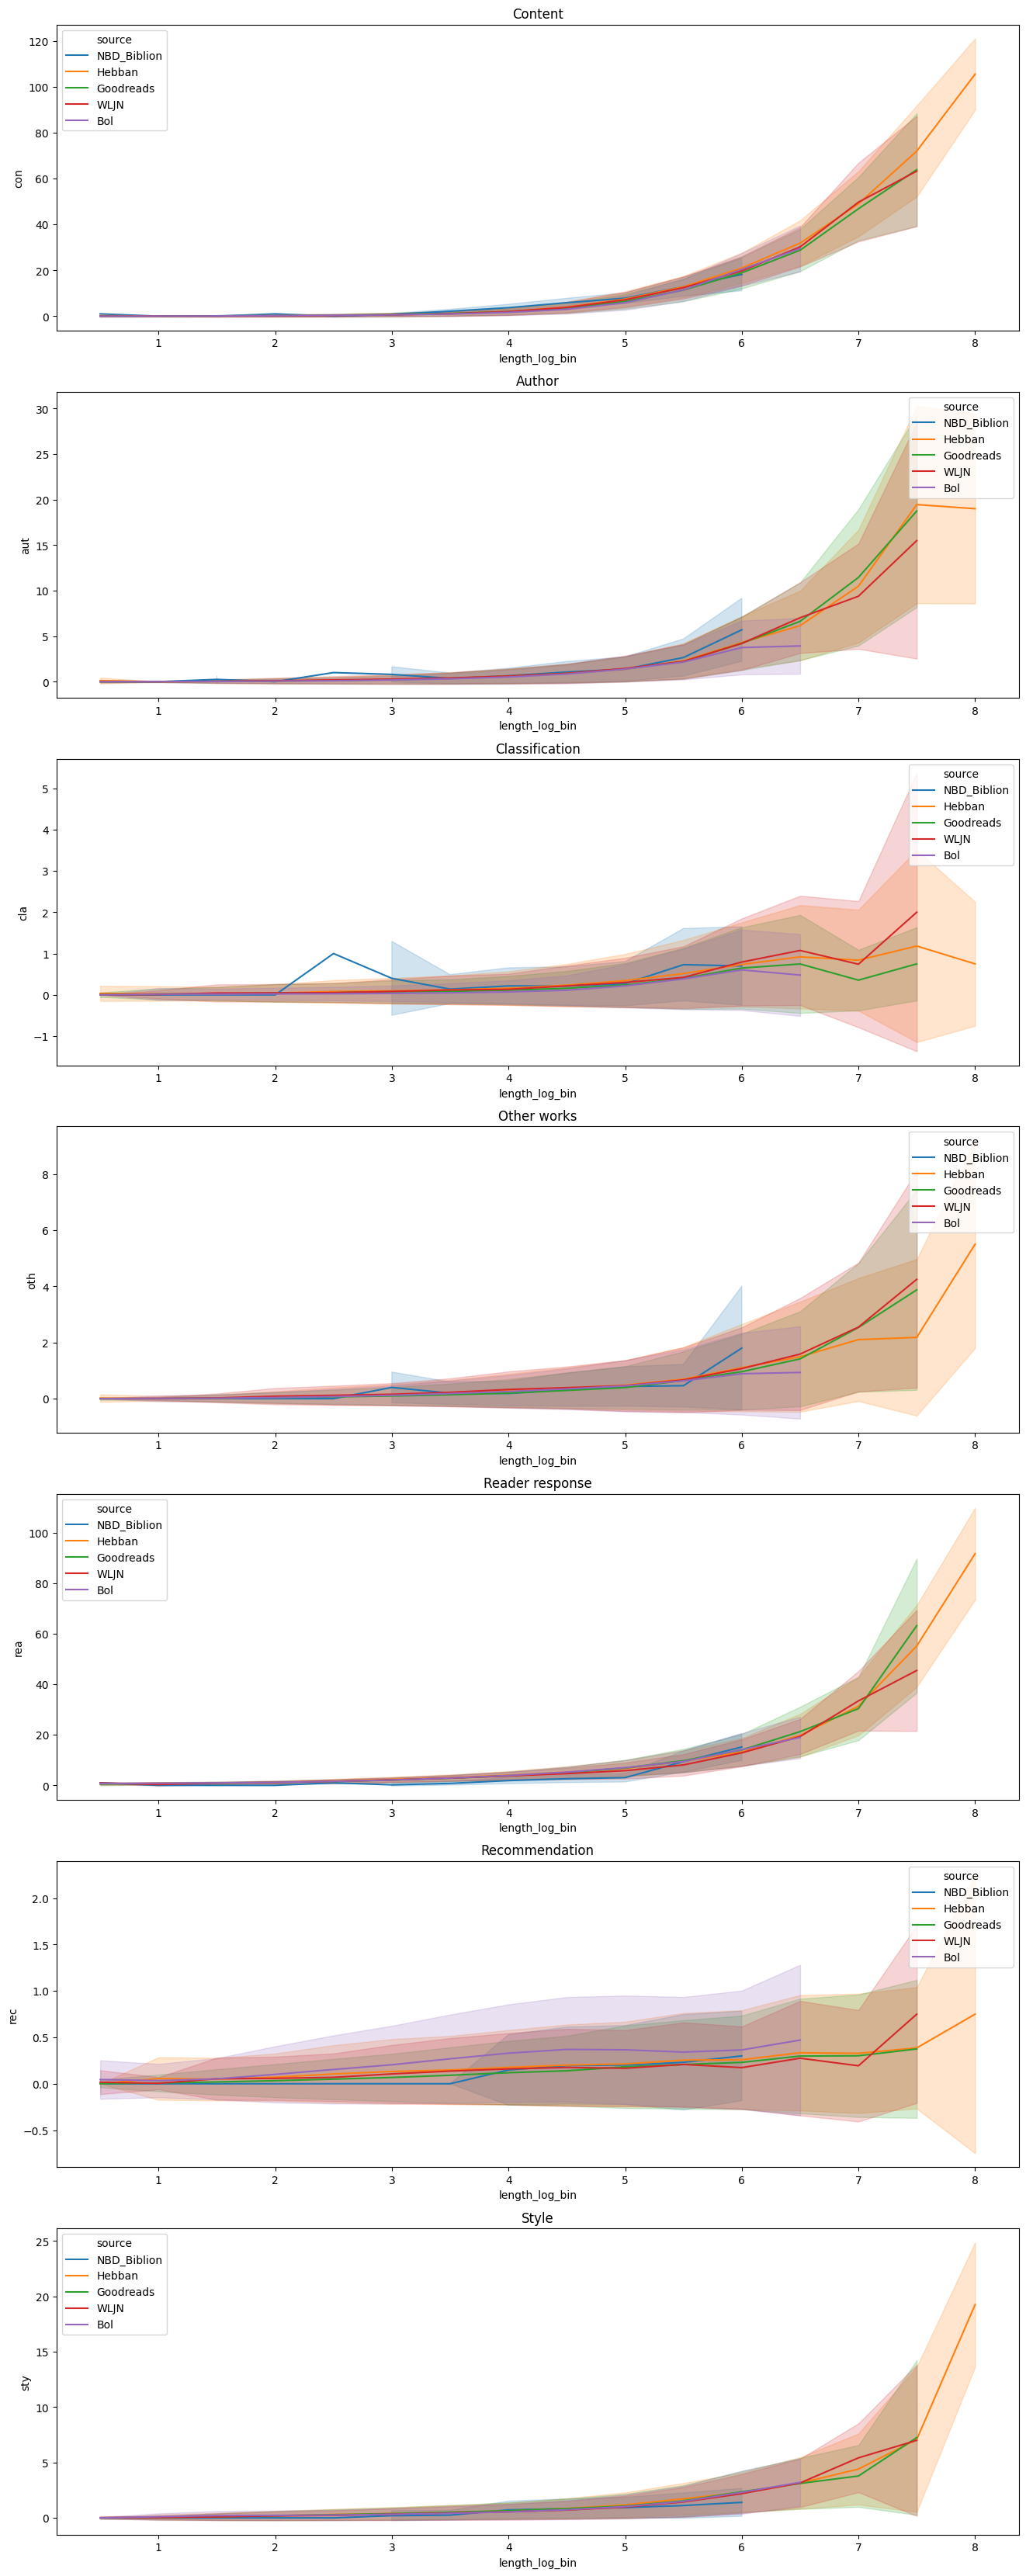

In [112]:
fig, ax = plt.subplots(7, 1)
anno_meta.columns

for ci, cat in enumerate(cat_map):
    sns.lineplot(big_sources_freq, x='length_log_bin', y=cat, hue='source', errorbar='sd', ax=ax[ci])
    ax[ci].title.set_text(cat_map[cat])

fig.set_size_inches(16, 42)

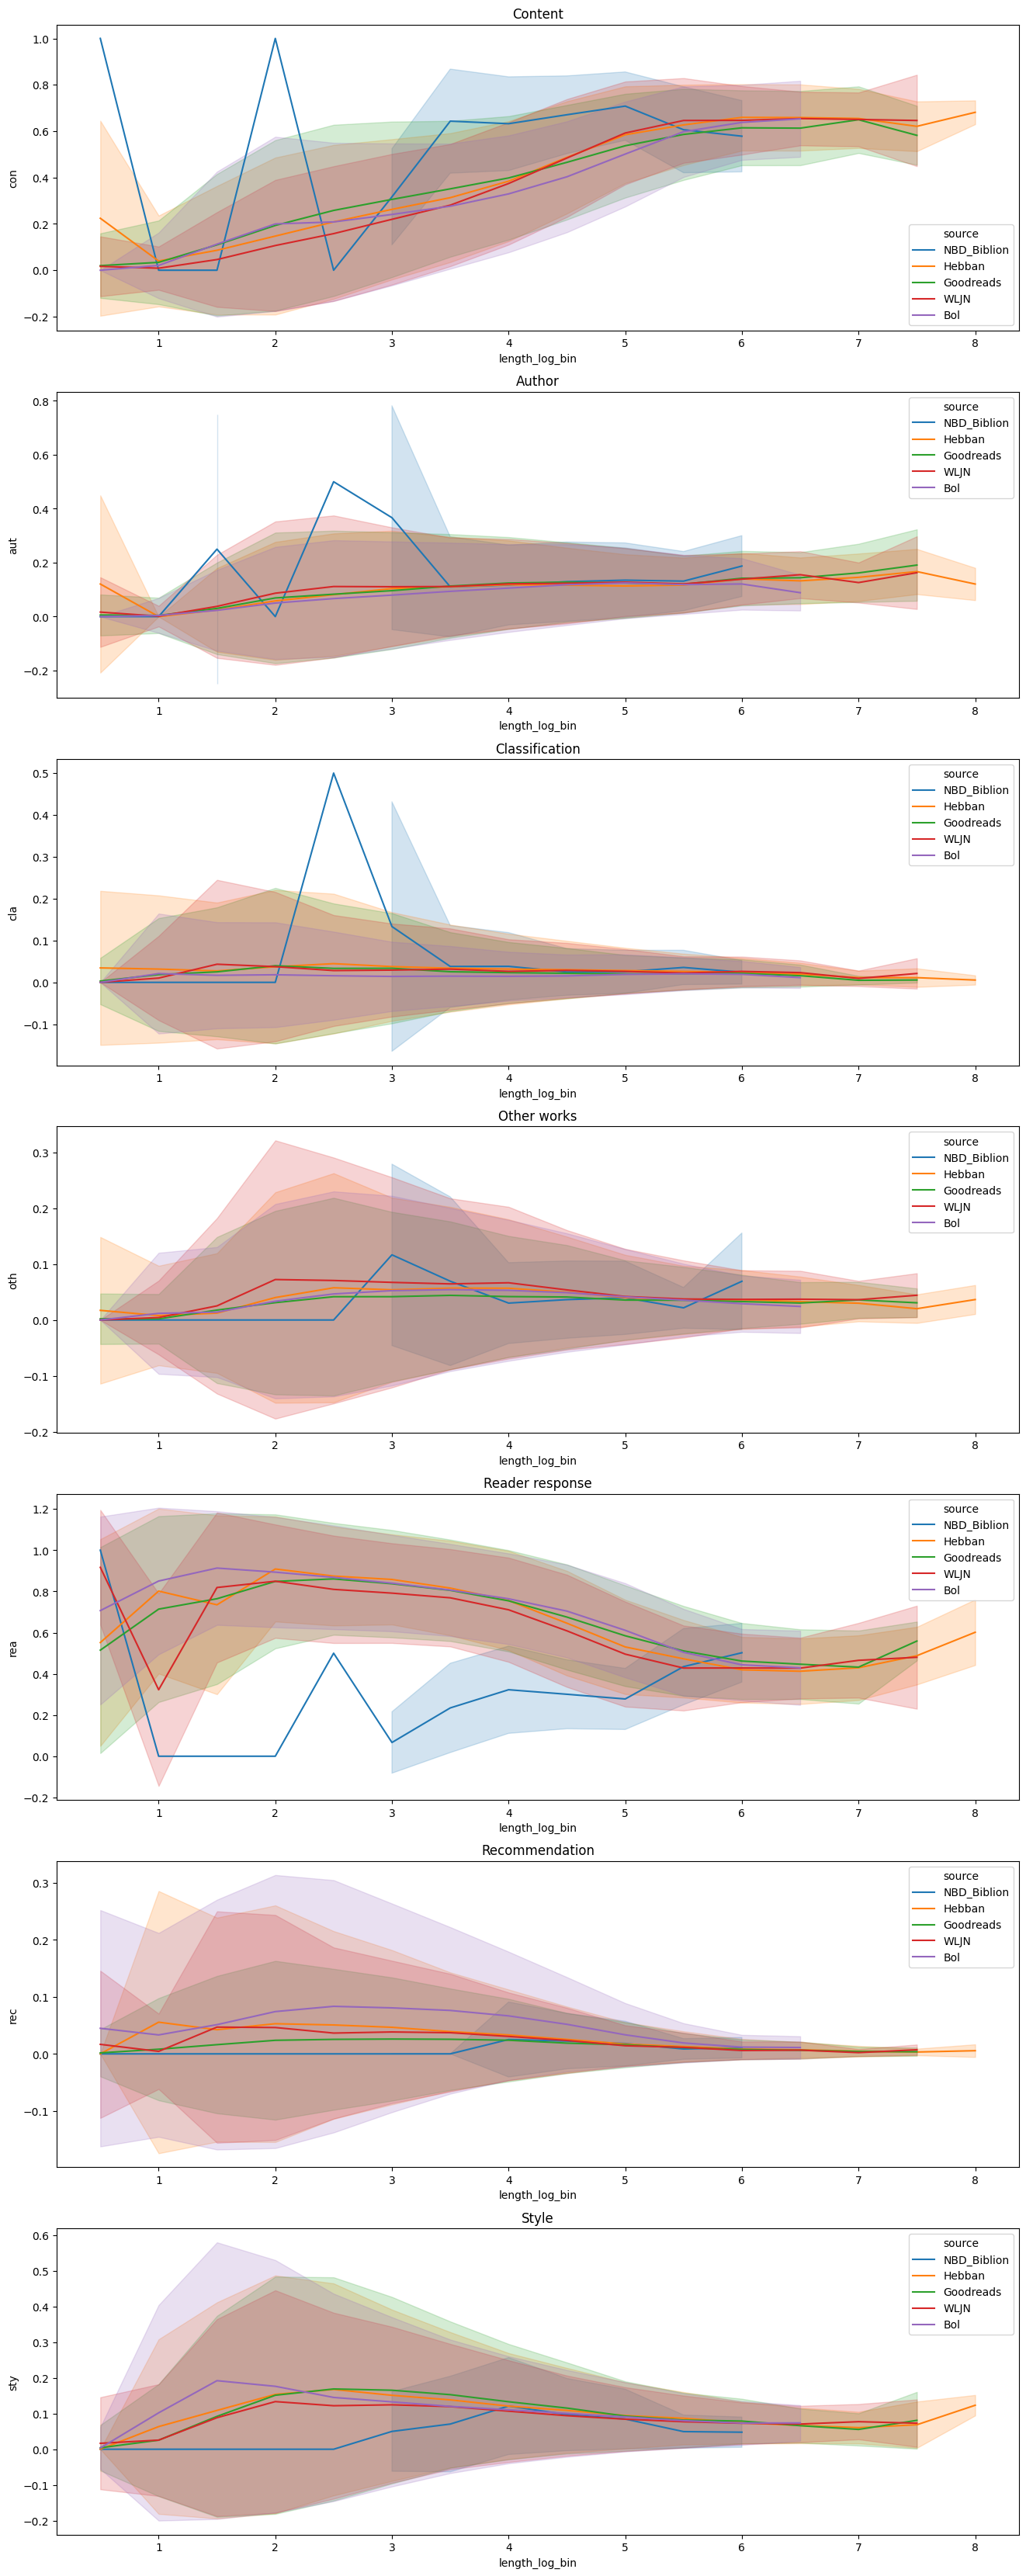

In [108]:
fig, ax = plt.subplots(7, 1)
anno_meta.columns

for ci, cat in enumerate(cat_map):
    sns.lineplot(big_sources_frac, x='length_log_bin', y=cat, hue='source', errorbar='sd', ax=ax[ci])
    ax[ci].title.set_text(cat_map[cat])

fig.set_size_inches(16, 42)

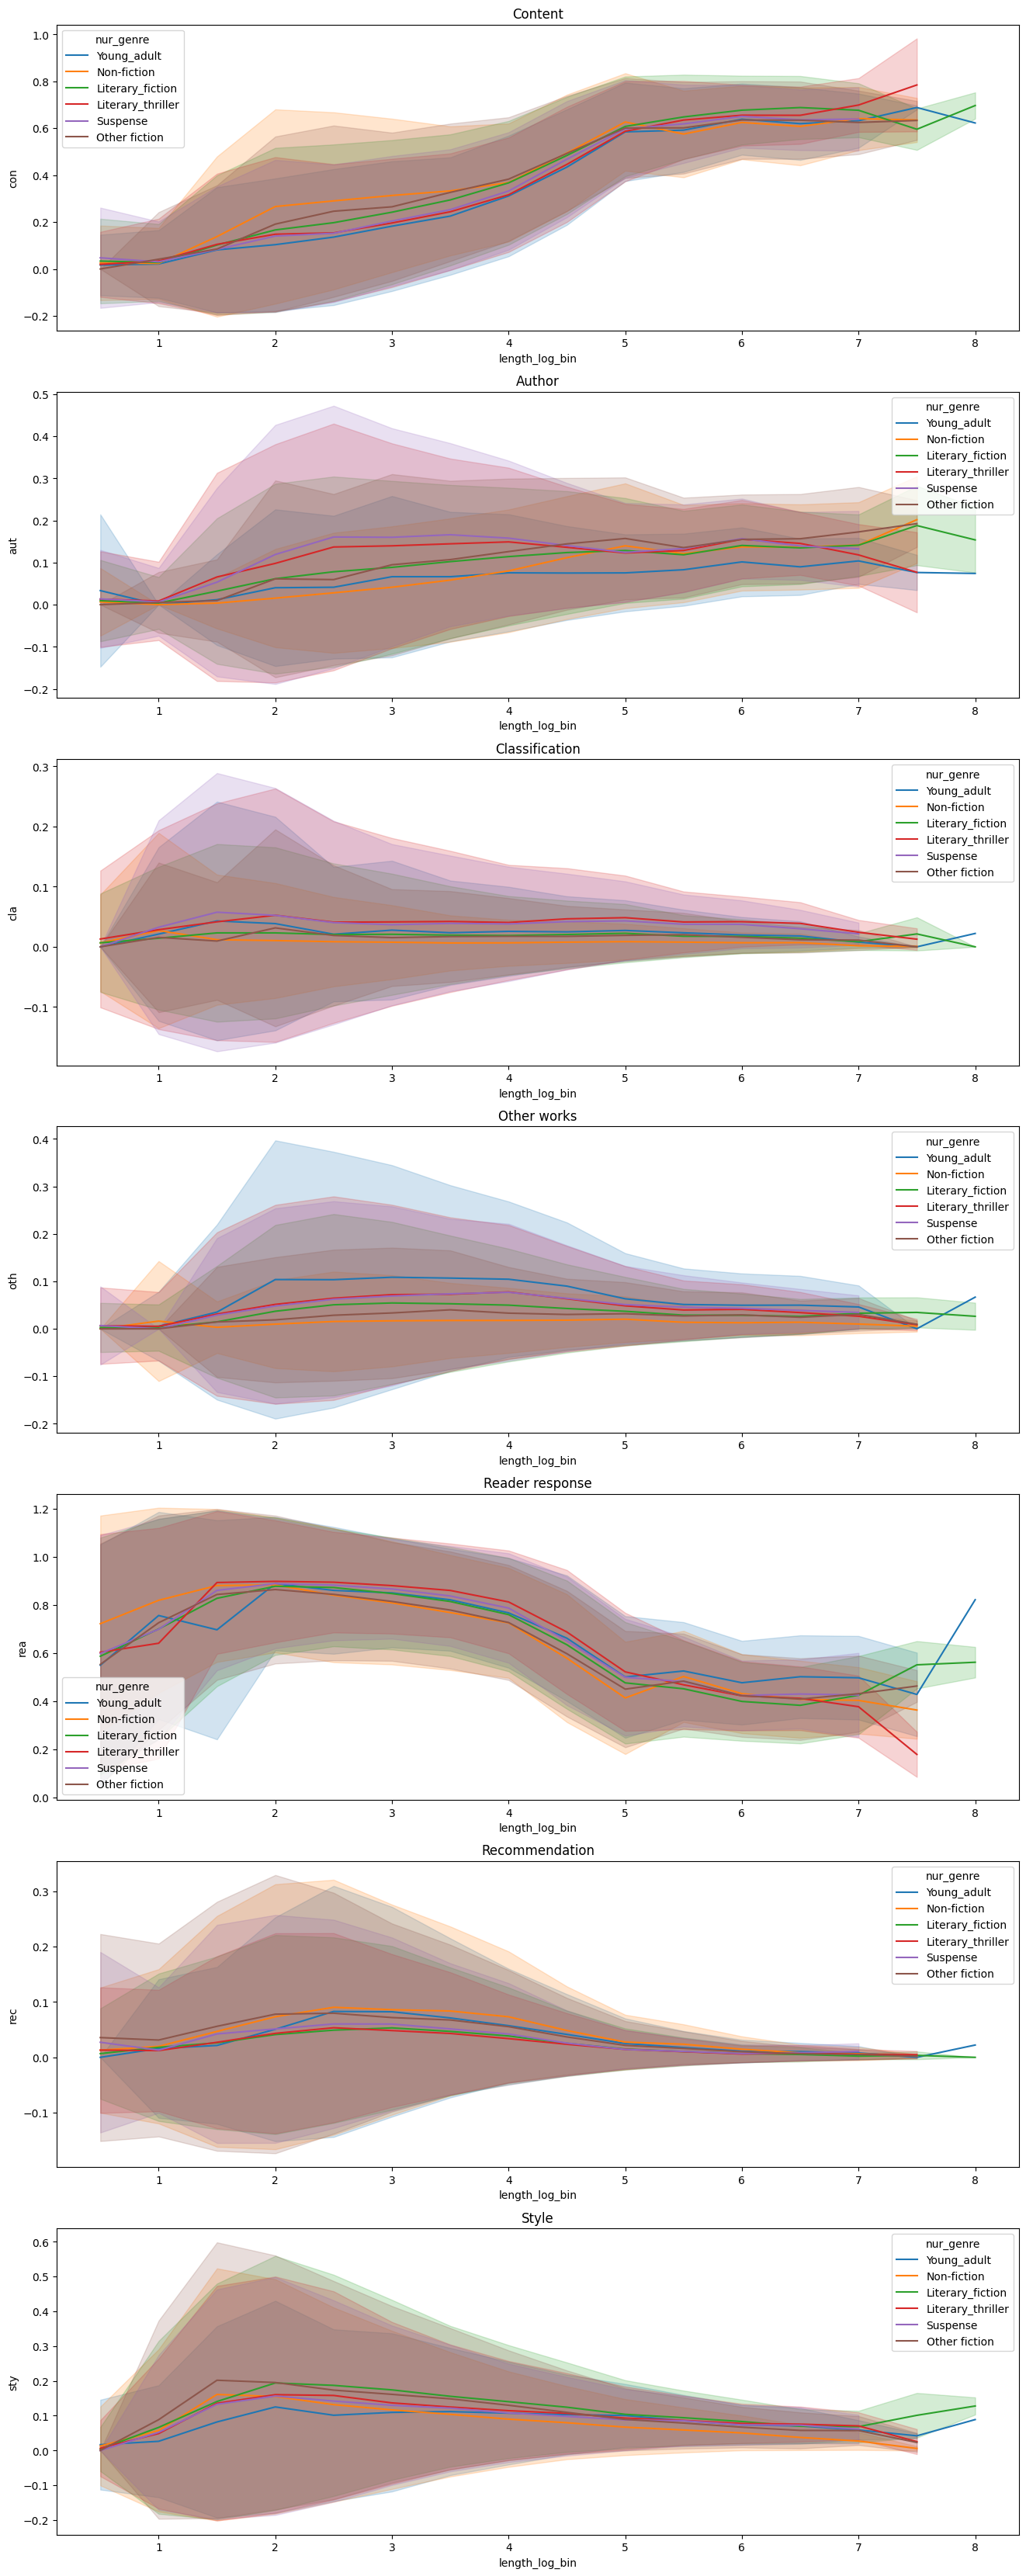

In [175]:
fig, ax = plt.subplots(7, 1)
anno_meta.columns

for ci, cat in enumerate(cat_map):
    sns.lineplot(big_genres_frac, x='length_log_bin', y=cat, hue='nur_genre', errorbar='sd', ax=ax[ci])
    ax[ci].title.set_text(cat_map[cat])


fig.set_size_inches(16, 42)